<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(_1_2)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-1.2'

In [4]:
os.listdir(base_path)

['data_multi_delta_-1.2_n20.csv',
 'data_multi_delta_-1.2_n30.csv',
 'data_multi_delta_-1.2_n60.csv',
 'data_multi_delta_-1.2_n120.csv',
 'data_multi_delta_-1.2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-1.2_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,50.722964,84.973363,55.509379,-0.003848,201.201858,201.200731,0.001127
1,0.0,1.0,93.973066,42.815339,67.660225,-0.084276,214.364354,214.449549,-0.085195
2,0.0,2.0,78.739234,39.262261,94.278787,-0.001534,222.278748,222.281805,-0.003057
3,0.0,3.0,63.010702,50.733931,20.492609,0.046389,144.283632,144.228384,0.055248
4,0.0,4.0,79.025929,27.107868,60.971297,-0.119819,176.985276,177.102199,-0.116923
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,36.931197,20.759474,92.612463,-0.099052,160.204082,160.309495,-0.105413
249996,999.0,246.0,22.052363,61.065807,30.610496,-0.098192,123.630474,123.733937,-0.103463
249997,999.0,247.0,70.463439,35.532565,67.681156,-0.000747,183.676413,183.671958,0.004454
249998,999.0,248.0,77.926023,49.415713,81.975657,-0.091291,219.226102,219.316844,-0.090743


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,50.722964,84.973363,55.509379,-0.003848,201.201858,201.200731,0.001127
1,0.0,1.0,93.973066,42.815339,67.660225,-0.084276,214.364354,214.449549,-0.085195
2,0.0,2.0,78.739234,39.262261,94.278787,-0.001534,222.278748,222.281805,-0.003057
3,0.0,3.0,63.010702,50.733931,20.492609,0.046389,144.283632,144.228384,0.055248
4,0.0,4.0,79.025929,27.107868,60.971297,-0.119819,176.985276,177.102199,-0.116923
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,36.931197,20.759474,92.612463,-0.099052,160.204082,160.309495,-0.105413
249996,999.0,246.0,22.052363,61.065807,30.610496,-0.098192,123.630474,123.733937,-0.103463
249997,999.0,247.0,70.463439,35.532565,67.681156,-0.000747,183.676413,183.671958,0.004454
249998,999.0,248.0,77.926023,49.415713,81.975657,-0.091291,219.226102,219.316844,-0.090743


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    50.722964  84.973363  55.509379  ...  201.201858  201.200731  0.001127
      1.0    93.973066  42.815339  67.660225  ...  214.364354  214.449549 -0.085195
      2.0    78.739234  39.262261  94.278787  ...  222.278748  222.281805 -0.003057
      3.0    63.010702  50.733931  20.492609  ...  144.283632  144.228384  0.055248
      4.0    79.025929  27.107868  60.971297  ...  176.985276  177.102199 -0.116923
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  36.931197  20.759474  92.612463  ...  160.204082  160.309495 -0.105413
      246.0  22.052363  61.065807  30.610496  ...  123.630474  123.733937 -0.103463
      247.0  70.463439  35.532565  67.681156  ...  183.676413  183.671958  0.004454
      248.0  77.926023  49.415713  81.975657  ...  219.226102  219.316844 -0.090743
      249.0  37.128809  67.352469  77.556409  ...  192.074297  192.051481  0.022816

[250000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    50.722964  84.973363  55.509379  ...  201.201858  201.200731  0.001127
      1.0    93.973066  42.815339  67.660225  ...  214.364354  214.449549 -0.085195
      2.0    78.739234  39.262261  94.278787  ...  222.278748  222.281805 -0.003057
      3.0    63.010702  50.733931  20.492609  ...  144.283632  144.228384  0.055248
      4.0    79.025929  27.107868  60.971297  ...  176.985276  177.102199 -0.116923
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  36.931197  20.759474  92.612463  ...  160.204082  160.309495 -0.105413
      246.0  22.052363  61.065807  30.610496  ...  123.630474  123.733937 -0.103463
      247.0  70.463439  35.532565  67.681156  ...  183.676413  183.671958  0.004454
      248.0  77.926023  49.415713  81.975657  ...  219.226102  219.316844 -0.090743
      249.0  37.128809  67.352469  77.556409  ...  192.074297  192.051481  0.022816

[250000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,50.722964,84.973363,55.509379,-0.003848,201.201858,201.200731,0.001127
1,0.0,1.0,93.973066,42.815339,67.660225,-0.084276,214.364354,214.449549,-0.085195
2,0.0,2.0,78.739234,39.262261,94.278787,-0.001534,222.278748,222.281805,-0.003057
3,0.0,3.0,63.010702,50.733931,20.492609,0.046389,144.283632,144.228384,0.055248
4,0.0,4.0,79.025929,27.107868,60.971297,-0.119819,176.985276,177.102199,-0.116923
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,36.931197,20.759474,92.612463,-0.099052,160.204082,160.309495,-0.105413
249996,999.0,246.0,22.052363,61.065807,30.610496,-0.098192,123.630474,123.733937,-0.103463
249997,999.0,247.0,70.463439,35.532565,67.681156,-0.000747,183.676413,183.671958,0.004454
249998,999.0,248.0,77.926023,49.415713,81.975657,-0.091291,219.226102,219.316844,-0.090743


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    50.722964  84.973363  55.509379  ...  201.201858  201.200731  0.001127
      1.0    93.973066  42.815339  67.660225  ...  214.364354  214.449549 -0.085195
      2.0    78.739234  39.262261  94.278787  ...  222.278748  222.281805 -0.003057
      3.0    63.010702  50.733931  20.492609  ...  144.283632  144.228384  0.055248
      4.0    79.025929  27.107868  60.971297  ...  176.985276  177.102199 -0.116923
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  36.931197  20.759474  92.612463  ...  160.204082  160.309495 -0.105413
      246.0  22.052363  61.065807  30.610496  ...  123.630474  123.733937 -0.103463
      247.0  70.463439  35.532565  67.681156  ...  183.676413  183.671958  0.004454
      248.0  77.926023  49.415713  81.975657  ...  219.226102  219.316844 -0.090743
      249.0  37.128809  67.352469  77.556409  ...  192.074297  192.051481  0.022816

[250000 rows x 7 columns]

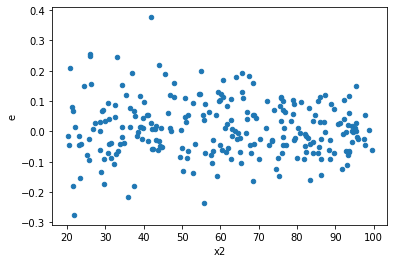

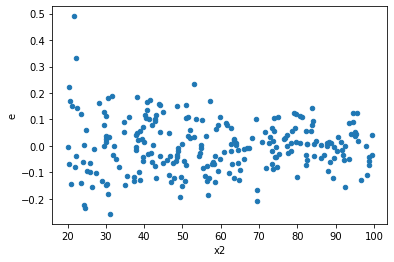

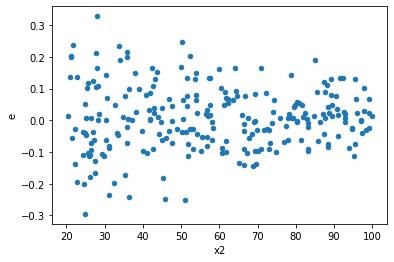

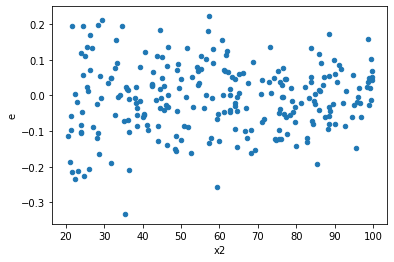

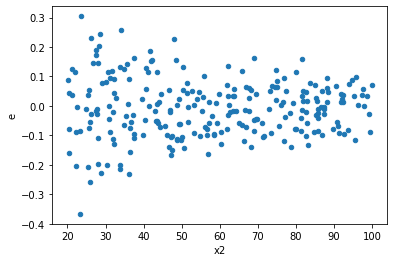

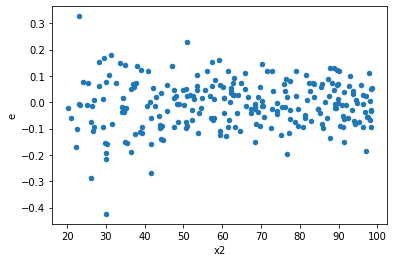

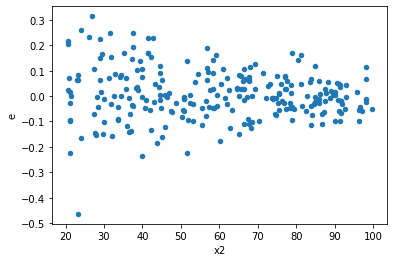

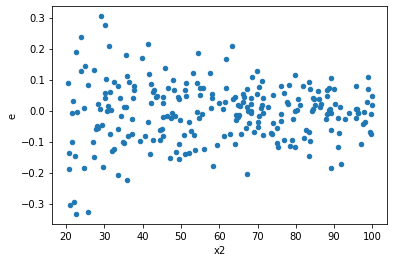

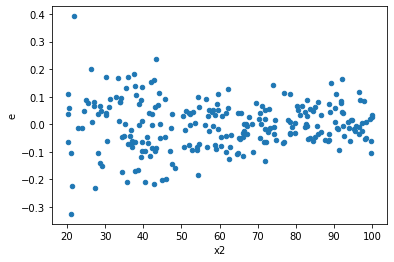

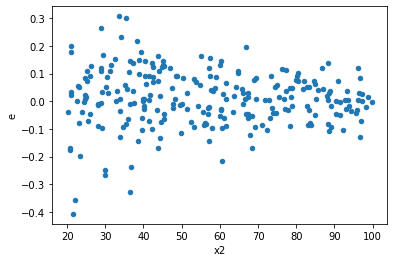

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,97.0,97.0,1.2674611717004078,0.5869082181450124,0.013066610017529979,0.006050600187061983,0.4630581443040378,0.000186609603624072,Reject005=0 : Heteroscedasticity
1.0,97.0,97.0,1.3644301411172024,0.5446039875037963,0.014066290114610334,0.005614474097977282,0.3991439144387941,9.181921345075366e-06,Reject005=0 : Heteroscedasticity
2.0,97.0,97.0,1.439460647226612,0.4180576249161299,0.01483980048687229,0.004309872421815773,0.2904265745101094,3.746387192320064e-09,Reject005=0 : Heteroscedasticity
3.0,97.0,97.0,1.157358736738515,0.4970457733467535,0.011931533368438298,0.005124183230378902,0.4294656078265319,4.272737307355309e-05,Reject005=0 : Heteroscedasticity
4.0,97.0,97.0,1.435114534048379,0.47318194228141647,0.014794995196375041,0.004878164353416665,0.32971719751635176,1.042335060355054e-07,Reject005=0 : Heteroscedasticity
5.0,97.0,97.0,1.0478710362324353,0.3735854978614005,0.01080279418796325,0.0038513968851690773,0.3565185838179165,7.045698597758376e-07,Reject005=0 : Heteroscedasticity
6.0,97.0,97.0,1.345949546032404,0.49003285813489905,0.013875768515797979,0.0050518851354113305,0.36407966374328077,1.155481076348119e-06,Reject005=0 : Heteroscedasticity
7.0,97.0,97.0,1.2153286373379384,0.5809725787960246,0.012529161209669468,0.005989408028824996,0.4780374303271498,0.0003365927973278889,Reject005=0 : Heteroscedasticity
8.0,97.0,97.0,1.278165401651437,0.3800804328289945,0.013176962903623062,0.0039183549776185,0.29736404407279093,7.098428263256443e-09,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    999
Reject005=1 : Homoscedasticity        1
Name: Result_test, dtype: int64